## Сборный проект 1

### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Оглавление:

1. [Изучение данных](#chapter1)<br>
2. [Подготовка данных](#chapter2)<br>
2.1 [Предобработка данных](#chapter2.1)<br>
2.2 [Категоризация данных](#chapter2.2)<br>
3. [Исследовательский анализ данных](#chapter3)<br>
4. [Портрет пользователей](#chapter4)<br>
5. [Проверка гипотез и пояснения](#chapter5)<br>
6. [Общий вывод](#chapter5)<br>

### Шаг 1. Изучение данных
<a class="anchor" id="chapter1"></a>

Откроем файл с данными и изучим информацию

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st

Дополнительно зададим форматы вывода столбцов и колонок в пандас

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
print(pd.get_option("display.max_rows"))
print(pd.get_option("display.max_columns"))

100
100


Просмотрим сначала 5 первых строк, если все ок, выгрузим все данные

In [6]:
df = pd.read_csv('datasets/games.csv', sep=',',nrows = 5)

In [7]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Все окей, теперь выгружаем весь датасет

In [9]:
df = pd.read_csv('datasets/games.csv', sep=',')

Просмотрим данные и опишем

In [10]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод
Мы видим таблицу с историческими данными из открытых источников доступны о продажах игр.

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.

В данных есть проблемы с типами, проблемы с верхними регистрами, есть пропуски.

 Полагаю пропуски связаны с нехваткой данных из-за большого периода выпуска игр, возможно рейтинги не столь давно ведут. Еще возможно часть игр не имеет больших продаж и ее даже не оценивали.

### Шаг 2. Подготовка данных
<a class="anchor" id="chapter2"></a>

#### Шаг 2.1. Предобработка данных
<a class="anchor" id="chapter2.1"></a>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем колонки к нижнему регистру

In [13]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [14]:
df.columns = df.columns.str.lower()

In [15]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

User_score со значениями tbd я бы заменил на NaN, так как выкинуть значения не можем просто, но и если заменим на средние будет не очень логично и еще поменяем формат на float64

In [16]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [17]:
df['user_score'] = df['user_score'].astype('float64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Заменим в столбце с рейтингом категориальные данные на количественные с возрастом категории , которые можно будет сравнивать, а пропуски заменим на значения 'no_data' и поменяем формат на float
 - M - 15+
 - E - 6+ (everyone)
 - T - 13+ 
 - E10+ - 10+
 - K-A - 10+
 - EC - 3+
 - AO - 18+
 - RP - pending 

In [20]:
df_a = (df
    .groupby('rating')
    .agg({'na_sales':['sum']})
    .sort_values(by=('na_sales', 'sum'), ascending=False)
)
df_a

,na_sales
,sum
rating,
E,1292.99
T,759.75
M,748.48
E10+,353.32
K-A,2.56
EC,1.53
AO,1.26
RP,0.00


In [16]:
df['rating'] = df['rating'].replace('M', 15)
df['rating'] = df['rating'].replace('E', 6)
df['rating'] = df['rating'].replace('T', 13)
df['rating'] = df['rating'].replace('E10+', 10)
df['rating'] = df['rating'].replace('K-A', 10)
df['rating'] = df['rating'].replace('EC', 3)
df['rating'] = df['rating'].replace('AO', 3)
df['rating'] = df['rating'].replace('RP', np.nan)


In [17]:
df['rating'].value_counts()

6.0     3990
13.0    2961
15.0    1563
10.0    1423
3.0        9
Name: rating, dtype: int64

In [18]:
df['rating'] = df['rating'].fillna('no_data')

In [19]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.000000
dtype: float64

In [20]:
df.iloc[:,4:].describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000
mean,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046
std,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Мы обработали данные - убрали проспуки и привели их к общему формату, убрали значения выходящие за рамки логики.

#### Шаг 2.2. Категоризация данных
<a class="anchor" id="chapter2.2"></a>

Теперь посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [23]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,6,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_data,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,6,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,6,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_data,31.38


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
total_sales        16715 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


### Вывод


 В рейтинге не менял на int, так как есть вероятность получить десятичное число в данных колонках и округление будет не разумно, тем более  вижу более разумным их сделать одним форматом  float64 все. Полагаем наличие пропусков обосновывается не ошибкой, а отсутствием информации и заменять их на средние или т.п. не вижу смысла. Так же делали дополнительный столбец с суммой проданных копий.

### Шаг 3. Исследовательский анализ данных
<a class="anchor" id="chapter3"></a>

Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. - Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посмотрим, сколько игр выпускалось в разные годы.

In [25]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,6,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_data,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,6,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,6,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_data,31.38


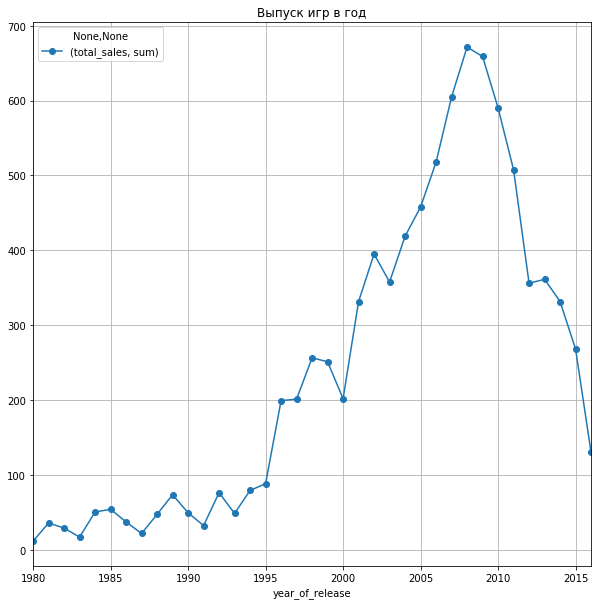

In [26]:
(df
    .groupby('year_of_release')
    .agg({'total_sales':['sum']})
    .plot(legend=True, style='o-', grid=True, figsize=(10, 10),title='Выпуск игр в год')
)

 Мы видим реский рост продаж на игры с 1996 и спад с 2008 года. Основной период с 2000 по 2015. Большой части игр нету в 2016 году, его можно не трогать. Рассмотрим интервал с 2009 года по 2015, когда у нас наиболее актуальные данные.

Полагаю причина спада - перестроение и изменение рынка в посткризисное время после 2008.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим какой характерный срок появляются новые и исчезают старые платформы?

In [27]:
top_platforms = (df
    .query('2000 <= year_of_release <= 2015')
    .groupby('platform')
    .agg({'total_sales':['sum']})
    .sort_values(by=('total_sales', 'sum'), ascending=False)
    .head(10)
)
top_platforms

,total_sales
,sum
platform,
PS2,1233.56
X360,959.72
PS3,927.74
Wii,891.00
DS,802.76
GBA,312.88
PSP,289.53
XB,251.57


In [28]:
platf = (df
    .query('platform in @top_platforms.index and 2000 <= year_of_release <= 2015')
    .groupby(['platform','year_of_release'])
    .agg({'total_sales':['sum']})
) 
platf

total_sales
                                 sum
platform year_of_release            
3DS      2011.0                63.20
         2012.0                51.36
         2013.0                56.57
         2014.0                43.76
         2015.0                27.78
DS       2004.0                17.27
         2005.0               130.14
         2006.0               119.81
         2007.0               146.94
         2008.0               145.31
         2009.0               119.54
         2010.0                85.02
         2011.0                26.18
         2012.0                11.01
         2013.0                 1.54
GBA      2000.0                 0.07
         2001.0                61.53
         2002.0                74.16
         2003.0                56.67
         2004.0                77.91
         2005.0                33.86
         2006.0                 5.28
         2007.0                 3.40
PS2      2000.0                39.17
         2001.0               166.43
         2002.0               205.38
         2003.0               184.31
         2004.0               211.81
         2005.0               160.66
         2006.0               103.42
         2007.0                75.99
         2008.0                53.90
         2009.0                26.40
         2010.0                 5.64
         2011.0                 0.45
PS3      2006.0                20.96
         2007.0                73.19
         2008.0               118.52
         2009.0               130.93
         2010.0               142.17
         2011.0               156.78
         2012.0               107.36
         2013.0               113.25
         2014.0                47.76
         2015.0                16.82
PS4      2013.0                25.99
         2014.0               100.00
         2015.0               118.90
PSP      2004.0                 7.06
         2005.0                43.84
         2006.0                55.32
         2007.0                46.93
         2008.0                34.55
         2009.0                37.78
         2010.0                35.04
         2011.0                17.82
         2012.0                 7.69
         2013.0                 3.14
         2014.0                 0.24
         2015.0                 0.12
Wii      2006.0               137.15
         2007.0               152.77
         2008.0               171.32
         2009.0               206.97
         2010.0               127.95
         2011.0                59.65
         2012.0                21.71
         2013.0                 8.59
         2014.0                 3.75
         2015.0                 1.14
X360     2005.0                 8.25
         2006.0                51.62
         2007.0                95.41
         2008.0               135.26
         2009.0               120.29
         2010.0               170.03
         2011.0               143.84
         2012.0                99.74
         2013.0                88.58
         2014.0                34.74
         2015.0                11.96
XB       2000.0                 0.99
         2001.0                22.26
         2002.0                48.01
         2003.0                55.04
         2004.0                65.42
         2005.0                49.08
         2006.0                10.04
         2007.0                 0.55
         2008.0                 0.18

Дропнем мультииндекс с годами и посчитаем количество лет жизни платформы за последние 15 лет без выбросов

In [29]:
platf.droplevel(level=1).index.value_counts()

PS2     12
PSP     12
X360    11
PS3     10
Wii     10
DS      10
XB       9
GBA      8
3DS      5
PS4      3
Name: platform, dtype: int64

In [30]:
platf.droplevel(level=1).index.value_counts().mean()

9.0

Мы видим что средний срок жизни платформы 9 лет по данным с 2000 по 2015 год. Но самые актуальные для нас данные в посткризисное время после 2008.

Теперь посмотрим данные по топовым платформам именно за интервал с 2009 - 2015

In [31]:
top10_platforms = (df
    .query('2009 <= year_of_release <= 2015')
    .groupby('platform')
    .agg({'total_sales':['sum']})
    .sort_values(by=('total_sales', 'sum'), ascending=False)
    .head(10)
)
top10_platforms

,total_sales
,sum
platform,
PS3,715.07
X360,669.18
Wii,429.76
PS4,244.89
DS,243.29
3DS,242.67
PC,133.62
XOne,133.17


In [32]:
(df
    .query('2009 <= year_of_release <= 2015 and platform in @top10_platforms.index')
    .pivot_table(index='platform', columns='year_of_release', values='total_sales',aggfunc='sum')
)

year_of_release,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
platform,,,,,,,
3DS,NaN,NaN,63.20,51.36,56.57,43.76,27.78
DS,119.54,85.02,26.18,11.01,1.54,NaN,NaN
PC,16.91,24.28,35.03,23.22,12.38,13.28,8.52
PS3,130.93,142.17,156.78,107.36,113.25,47.76,16.82
PS4,NaN,NaN,NaN,NaN,25.99,100.00,118.90
PSP,37.78,35.04,17.82,7.69,3.14,0.24,0.12
Wii,206.97,127.95,59.65,21.71,8.59,3.75,1.14
WiiU,NaN,NaN,NaN,17.56,21.65,22.03,16.35
X360,120.29,170.03,143.84,99.74,88.58,34.74,11.96


Сохраним отдельный df с нашей выборкой по годам и платформ с топ 10 по оборотам

In [33]:
df_top10_2009 = (df
    .query('2009 <= year_of_release <= 2015 and platform in @top10_platforms.index')
    .copy()
)         

Мы видим 2 наиболее популярных и актуальных платформы по продажам - PS4, XOne, 3DS, WiiU. У остальных платформ продажи либо совсем в нуле либо на минимумах.

Построим боксплот и опишем данные продаж по всем топовым платформам и потом по 2-м топовым и сравним их.

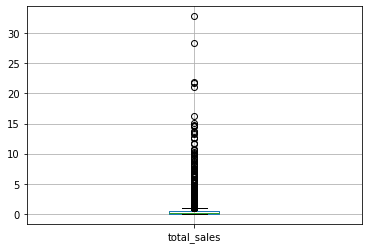

In [34]:
(df_top10_2009
    .boxplot(column=['total_sales'])
)

In [35]:
(df_top10_2009
   ['total_sales'].describe()
)

count    5716.000000
mean        0.523280
std         1.396393
min         0.010000
25%         0.050000
50%         0.150000
75%         0.440000
max        32.770000
Name: total_sales, dtype: float64

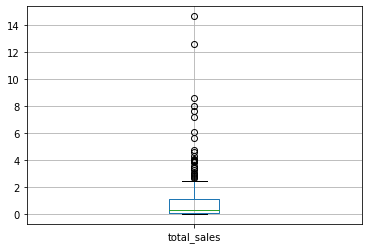

In [36]:
(df_top10_2009
    .query('platform =="PS4"')
    .boxplot(column=['total_sales'])
)

In [37]:
(df_top10_2009
    .query('platform =="PS4"')
    ['total_sales'].describe()
)

count    228.000000
mean       1.074079
std        1.899788
min        0.010000
25%        0.097500
50%        0.310000
75%        1.105000
max       14.630000
Name: total_sales, dtype: float64

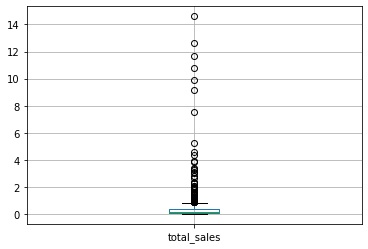

In [38]:
(df_top10_2009
    .query('platform =="3DS"')
    .boxplot(column=['total_sales'])
)

In [39]:
(df_top10_2009
    .query('platform =="3DS"')
   ['total_sales'].describe()
)

count    466.000000
mean       0.520751
std        1.473436
min        0.010000
25%        0.060000
50%        0.130000
75%        0.377500
max       14.600000
Name: total_sales, dtype: float64

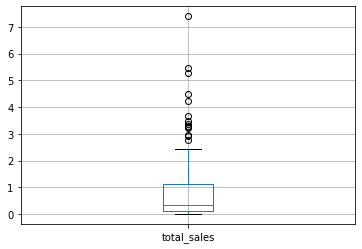

In [40]:
(df_top10_2009
    .query('platform =="XOne"')
    .boxplot(column=['total_sales'])
)

In [41]:
(df_top10_2009
    .query('platform =="XOne"')
    ['total_sales'].describe()
)

count    160.000000
mean       0.832313
std        1.182243
min        0.010000
25%        0.130000
50%        0.350000
75%        1.137500
max        7.390000
Name: total_sales, dtype: float64

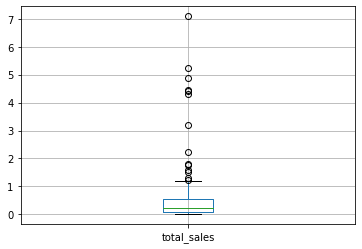

In [42]:
(df_top10_2009
    .query('platform =="WiiU"')
    .boxplot(column=['total_sales'])
)

In [43]:
(df_top10_2009
    .query('platform =="WiiU"')
    ['total_sales'].describe()
)

count    133.000000
mean       0.583383
std        1.105384
min        0.010000
25%        0.080000
50%        0.220000
75%        0.530000
max        7.090000
Name: total_sales, dtype: float64

Исходя из данных мы видим:
- средние показатели продаж по платформам mean = 0,5, median = 0,15, std = 1,4
- платформа PS4 mean = 1,1 , median = 0,3 , std = 1,9
- платформа 3DS mean = 0,5 , median = 0,13 , std = 1,5
- платформа XOne mean = 0,8 , median = 0,35 , std = 1,2
- платформа WiiU mean = 0,6 , median = 0,22 , std = 1,1

Наиболее популярная платформа PS4, она имеет самые высокие показатели продаж, так же это можно обосновать активным продвижением бренда PS4 во всем мире, особенно после 2009.

Посмотрим как влияют на продажи внутри одной популярной платформы, в нашем случае PS4, отзывы покупателей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

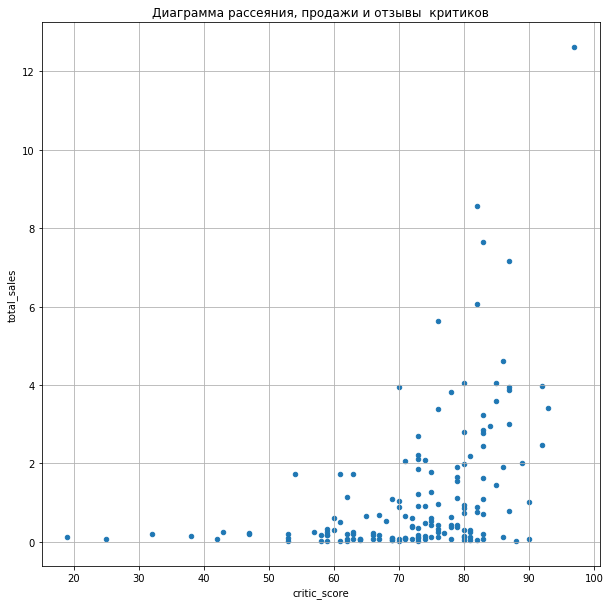

In [44]:
(df_top10_2009
    .query('platform == "PS4"')
    .plot(y='total_sales', x='critic_score', kind = 'scatter',legend=True, grid=True, figsize=(10, 10),title='Диаграмма рассеяния, продажи и отзывы  критиков')
)

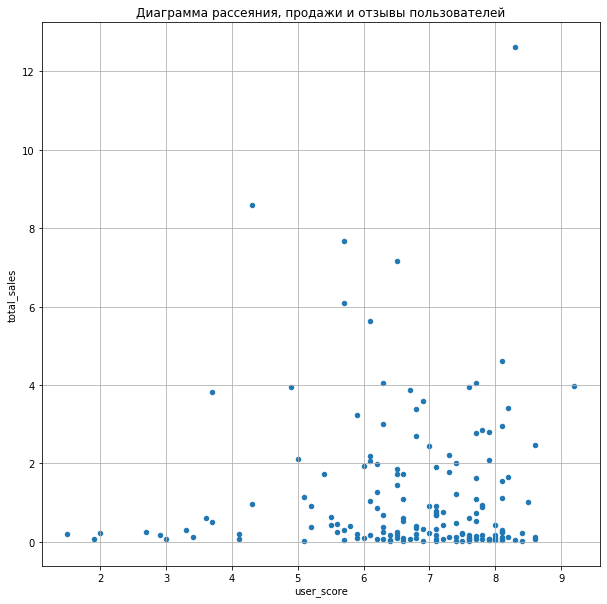

In [45]:
(df_top10_2009
    .query('platform == "PS4"')
    .plot(y='total_sales', x='user_score', kind = 'scatter',legend=True, grid=True, figsize=(10, 10),title='Диаграмма рассеяния, продажи и отзывы пользователей')
)

Пропишем функцию для нахождения корреляции по платформе

In [46]:
def corr(df,platform):
    print('Корреляция между продажами и оценкой критиков',str(platform),':',df.query('platform == @platform')['total_sales']
      .corr(df.query('platform == @platform')['critic_score']))
    print('Корреляция между продажами и оценкой пользователей',str(platform),':', df.query('platform == @platform')['total_sales']
      .corr(df.query('platform == @platform')['user_score']))

In [47]:
corr(df_top10_2009,'PS4')

Корреляция между продажами и оценкой критиков PS4 : 0.4318482049982005
Корреляция между продажами и оценкой пользователей PS4 : 0.024230832360622553


In [48]:
corr(df_top10_2009,'XOne')

Корреляция между продажами и оценкой критиков XOne : 0.4593845680707106
Корреляция между продажами и оценкой пользователей XOne : -0.03926828544552199


In [49]:
corr(df_top10_2009,'3DS')

Корреляция между продажами и оценкой критиков 3DS : 0.3610269340210956
Корреляция между продажами и оценкой пользователей 3DS : 0.23441244400535474


In [50]:
corr(df_top10_2009,'WiiU')

Корреляция между продажами и оценкой критиков WiiU : 0.3546914930621983
Корреляция между продажами и оценкой пользователей WiiU : 0.41326541780286724


Для PS4, XOne есть прямая корреляция с отзывами критиков и отсутствие корреляции для отзывов покупателей.<br>
Для 3DS, WiiU есть прямая корреляция с отзывами критиков и отзывами покупателей.

Возможно такая ситуация связана с распространением платформ в разных регионах. Так же пользователю сложно дать корректную оценку в отличии от критика у которого есть компетенция.

Посмотрим на общее распределение игр по жанрам.

In [51]:
df_top10_2009.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,6,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,6,28.32
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,6,21.82
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,6,21.80
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,15,21.05


In [52]:
(df_top10_2009
    .groupby('genre')
    .agg({'total_sales':['sum']})
    .sort_values(by=('total_sales', 'sum'), ascending=False)
)

,total_sales
,sum
genre,
Action,759.46
Shooter,506.22
Sports,427.57
Role-Playing,333.04
Misc,297.85
Platform,153.08
Racing,149.64
Fighting,104.20


 - Самые прибыльные жанры: Action, Shooter, Sports
 - Самые низкодоходные жанры: Adventure, Strategy, Puzzle

### Вывод
- Мы видим что средний срок жизни платформы около 9 лет и актуальность данных с 2009 по 2015 год.
- Исходя из данных мы видим 2-х лидеров по платформам PS4, XOne, 3DS, WiiU. Платформа PS4 на данный момент имеет самые высокие показатели продаж.
- Мы видим для PS4, XOne есть прямая корреляция с отзывами критиков и отсутствие корреляции для отзывов покупателей.<br>Для 3DS, WiiU есть прямая корреляция с отзывами критиков и отзывами покупателей.
- Самые прибыльные жанры: Action, Shooter, Sports
- Самые низкодоходные жанры: Adventure, Strategy, Puzzle

### Шаг 4. Портрет пользователей
<a class="anchor" id="chapter4"></a>

Составим портрет пользователя каждого региона.
Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Ответим на вопрос - влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [53]:
df_top10_2009.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,6,32.77
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,6,28.32
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,6,21.82
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,6,21.80
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,15,21.05


##### Ответим на вопросы для региона NA

In [54]:
platforms = (df_top10_2009
    .groupby('platform')
    .agg({'na_sales':['sum']})
    .sort_values(by=('na_sales', 'sum'), ascending=False)
    .copy()
)
platforms.columns = ['sum_sales']
total_sum_sales = platforms.sum()
print(total_sum_sales)
print(platforms)

sum_sales    1397.03
dtype: float64
          sum_sales
platform           
X360         407.49
PS3          291.23
Wii          235.69
DS           120.61
PS4           87.25
XOne          78.85
3DS           78.51
PC            39.13
WiiU          36.00
PSP           22.27


Text(0, 0.5, 'Процент от всех продаж')

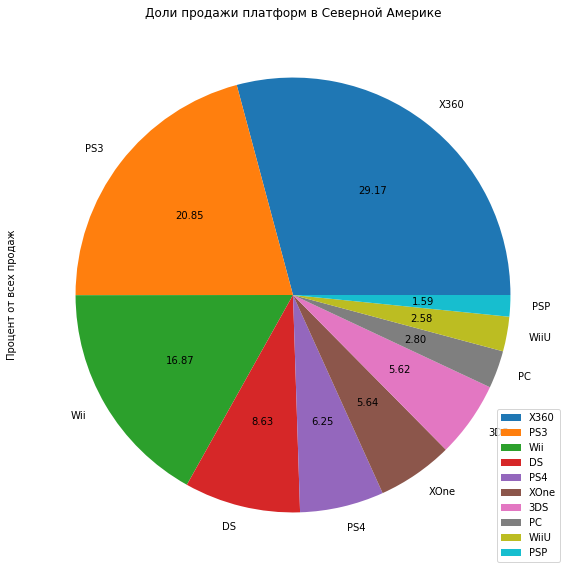

In [55]:
platforms['sales_share'] = (platforms['sum_sales'] / total_sum_sales['sum_sales'])
platforms['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продажи платформ в Северной Америке')
plt.ylabel('Процент от всех продаж')

In [56]:
genres = (df_top10_2009
    .groupby('genre')
    .agg({'na_sales':['sum']})
    .sort_values(by=('na_sales', 'sum'), ascending=False)
    .copy()
)
genres.columns = ['sum_sales']
total_sum_sales = genres.sum()
print(total_sum_sales)
print(genres)

sum_sales    1397.03
dtype: float64
              sum_sales
genre                  
Action           346.16
Shooter          258.30
Sports           215.12
Misc             161.40
Role-Playing     122.64
Platform          72.34
Racing            59.13
Fighting          52.60
Simulation        42.48
Adventure         29.18
Puzzle            20.12
Strategy          17.56


Text(0, 0.5, 'Процент от всех продаж')

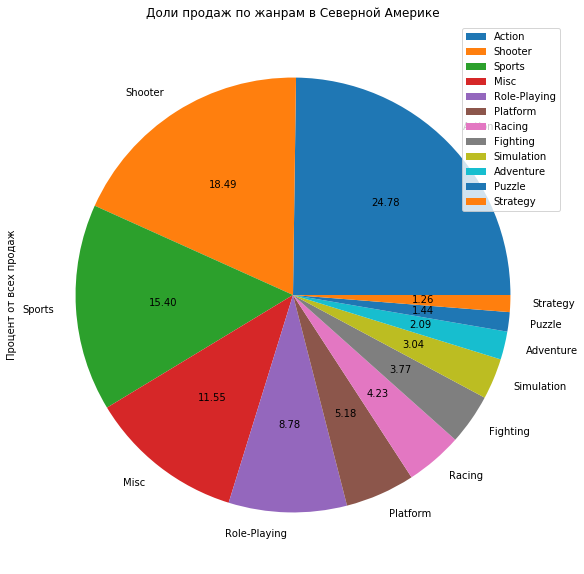

In [57]:
genres['sales_share'] = (genres['sum_sales'] / total_sum_sales['sum_sales'])
genres['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по жанрам в Северной Америке')
plt.ylabel('Процент от всех продаж')

In [58]:
ratings = (df_top10_2009
    .groupby('rating')
    .agg({'na_sales':['sum']})
    .sort_values(by=('na_sales', 'sum'), ascending=False)
    .copy()
)
ratings.columns = ['sum_sales']
total_sum_sales = ratings.sum()
print(total_sum_sales)
print(ratings)

sum_sales    1397.03
dtype: float64
         sum_sales
rating            
15.0        421.32
6.0         388.59
13.0        211.96
10.0        194.53
no_data     179.31
3.0           1.32


Text(0, 0.5, 'Процент от всех продаж возраст от ')

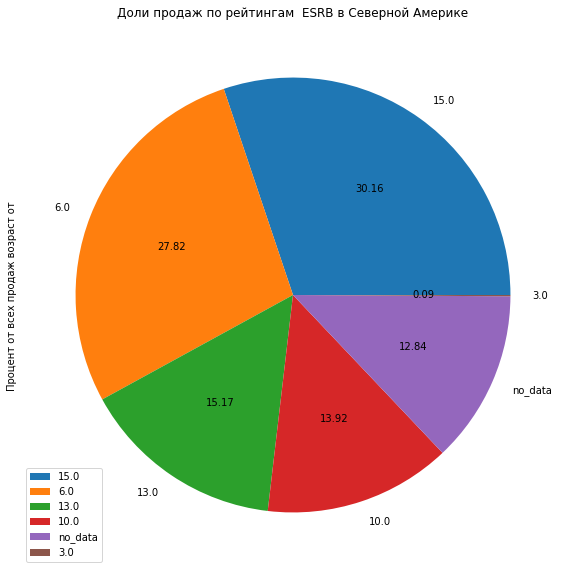

In [59]:
ratings['sales_share'] = (ratings['sum_sales'] / total_sum_sales['sum_sales'])
ratings['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по рейтингам  ESRB в Северной Америке')
plt.ylabel('Процент от всех продаж возраст от ')

 - Мы видим что в Севернной Америке топ 5 популярных платформ X360, PS3, Wii, PS4, DS.
 - Мы видим что в Севернной Америке топ 5 популярных жанров Action, Sports, Shooter, Misc, Role-Playing
 - Мы видим что в Севернной Америке продаються игры хорошо с возрастными рейтингами ERSB 6+(28%), 15+(30%, как основной сегмент выделим 15+

##### Ответим на вопросы для региона EU

In [60]:
platforms = (df_top10_2009
    .groupby('platform')
    .agg({'eu_sales':['sum']})
    .sort_values(by=('eu_sales', 'sum'), ascending=False)
    .copy()
)
platforms.columns = ['sum_sales']
total_sum_sales = platforms.sum()
print(total_sum_sales)
print(platforms)

sum_sales    958.64
dtype: float64
          sum_sales
platform           
PS3          253.74
X360         196.01
Wii          124.11
PS4          109.31
PC            78.79
3DS           58.94
DS            53.89
XOne          41.96
WiiU          23.65
PSP           18.24


Text(0, 0.5, 'Процент от всех продаж')

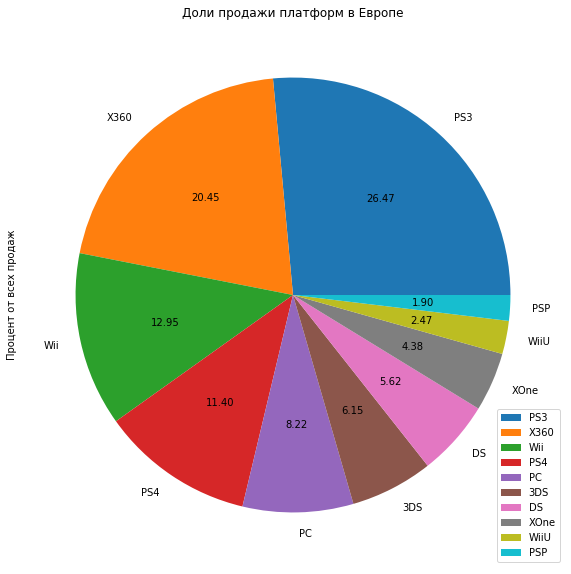

In [61]:
platforms['sales_share'] = (platforms['sum_sales'] / total_sum_sales['sum_sales'])
platforms['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продажи платформ в Европе')
plt.ylabel('Процент от всех продаж')

In [62]:
genres = (df_top10_2009
    .groupby('genre')
    .agg({'eu_sales':['sum']})
    .sort_values(by=('eu_sales', 'sum'), ascending=False)
    .copy()
)
genres.columns = ['sum_sales']
total_sum_sales = genres.sum()
print(total_sum_sales)
print(genres)

sum_sales    958.64
dtype: float64
              sum_sales
genre                  
Action           256.07
Shooter          174.82
Sports           142.79
Misc              83.48
Role-Playing      78.12
Racing            64.49
Platform          46.61
Simulation        35.78
Fighting          25.56
Adventure         22.25
Strategy          16.69
Puzzle            11.98


Text(0, 0.5, 'Процент от всех продаж')

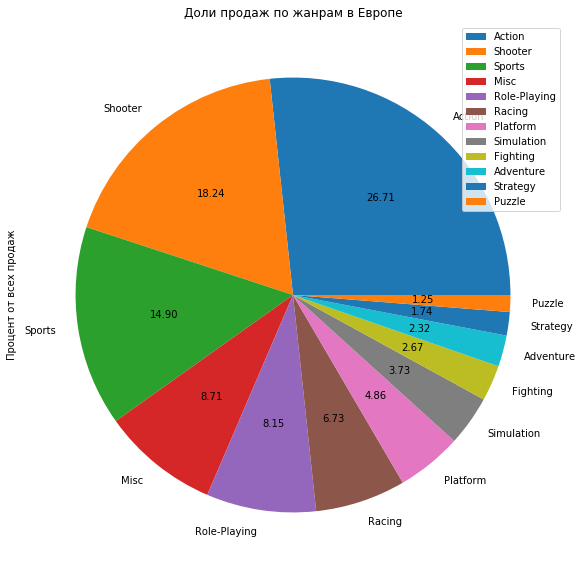

In [63]:
genres['sales_share'] = (genres['sum_sales'] / total_sum_sales['sum_sales'])
genres['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по жанрам в Европе')
plt.ylabel('Процент от всех продаж')

In [64]:
ratings = (df_top10_2009
    .groupby('rating')
    .agg({'eu_sales':['sum']})
    .sort_values(by=('eu_sales', 'sum'), ascending=False)
    .copy()
)
ratings.columns = ['sum_sales']
total_sum_sales = ratings.sum()
print(total_sum_sales)
print(ratings)

sum_sales    958.64
dtype: float64
         sum_sales
rating            
15.0        307.12
6.0         242.97
no_data     155.28
13.0        139.81
10.0        113.46
3.0           0.00


Text(0, 0.5, 'Процент от всех продаж возраст от ')

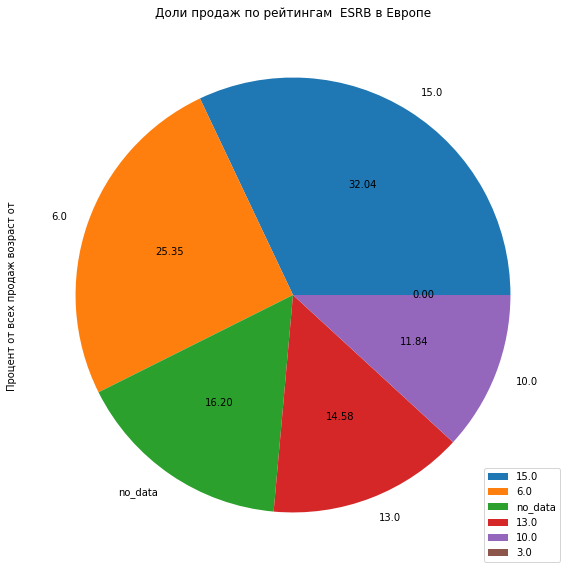

In [65]:
ratings['sales_share'] = (ratings['sum_sales'] / total_sum_sales['sum_sales'])
ratings['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по рейтингам  ESRB в Европе')
plt.ylabel('Процент от всех продаж возраст от ')

 Протрет пользователя в Европе:
 - платформа: PS3, X360, WiiU
 - жанры: Action, Sports, Shooter
 - Мы видим что в Европе продаються игры хорошо с возрастными рейтингами ERSB 6+(25%), 15+(32%), как основной сегмент выделим 15+

##### Ответим на вопросы для региона JP

In [66]:
platforms = (df_top10_2009
    .groupby('platform')
    .agg({'jp_sales':['sum']})
    .sort_values(by=('jp_sales', 'sum'), ascending=False)
    .copy()
)
platforms.columns = ['sum_sales']
total_sum_sales = platforms.sum()
print(total_sum_sales)
print(platforms)

sum_sales    326.7
dtype: float64
          sum_sales
platform           
3DS           92.59
PS3           66.99
DS            52.11
PSP           50.39
Wii           34.32
WiiU          12.34
PS4           10.22
X360           7.41
XOne           0.33
PC             0.00


Text(0, 0.5, 'Процент от всех продаж')

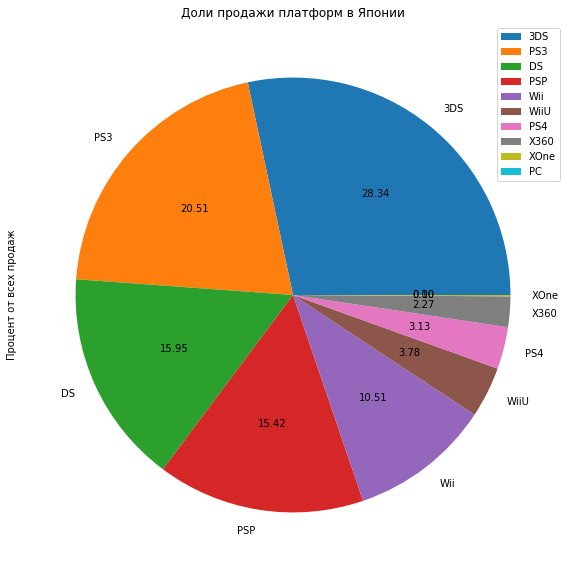

In [67]:
platforms['sales_share'] = (platforms['sum_sales'] / total_sum_sales['sum_sales'])
platforms['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продажи платформ в Японии')
plt.ylabel('Процент от всех продаж')

In [68]:
genres = (df_top10_2009
    .groupby('genre')
    .agg({'jp_sales':['sum']})
    .sort_values(by=('jp_sales', 'sum'), ascending=False)
    .copy()
)
genres.columns = ['sum_sales']
total_sum_sales = genres.sum()
print(total_sum_sales)
print(genres)

sum_sales    326.7
dtype: float64
              sum_sales
genre                  
Role-Playing     107.15
Action            71.70
Misc              26.76
Sports            22.68
Platform          20.48
Fighting          15.34
Adventure         15.15
Shooter           13.84
Simulation        13.82
Strategy           7.77
Racing             7.01
Puzzle             5.00


Text(0, 0.5, 'Процент от всех продаж')

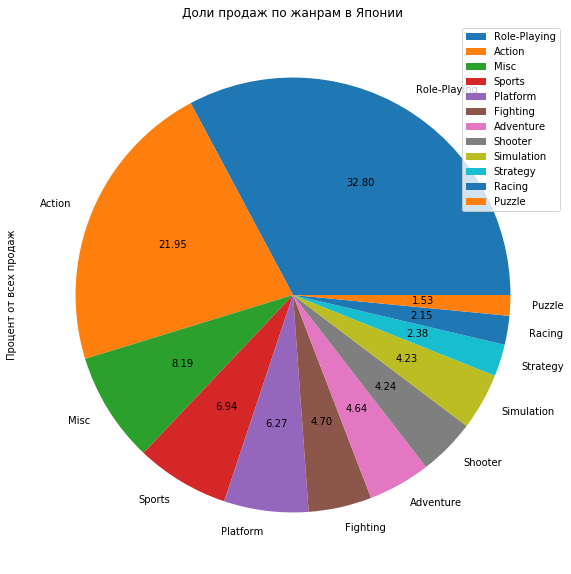

In [69]:
genres['sales_share'] = (genres['sum_sales'] / total_sum_sales['sum_sales'])
genres['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по жанрам в Японии')
plt.ylabel('Процент от всех продаж')

In [70]:
ratings = (df_top10_2009
    .groupby('rating')
    .agg({'jp_sales':['sum']})
    .sort_values(by=('jp_sales', 'sum'), ascending=False)
    .copy()
)
ratings.columns = ['sum_sales']
total_sum_sales = ratings.sum()
print(total_sum_sales)
print(ratings)

sum_sales    326.7
dtype: float64
         sum_sales
rating            
no_data     171.53
6.0          59.77
13.0         42.78
15.0         32.50
10.0         20.12
3.0           0.00


Text(0, 0.5, 'Процент от всех продаж возраст от ')

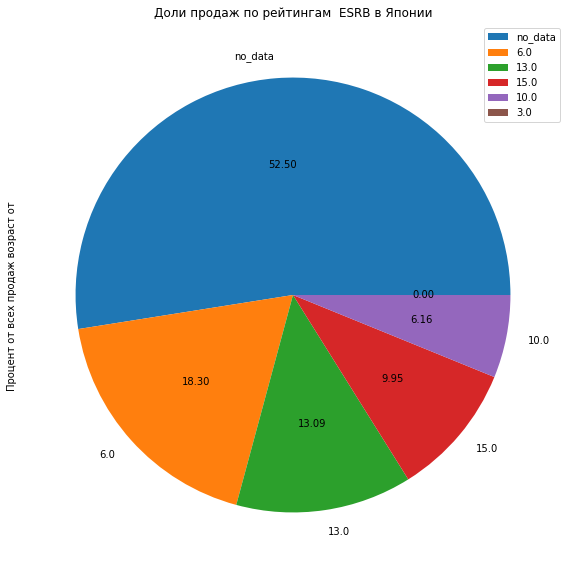

In [71]:
ratings['sales_share'] = (ratings['sum_sales'] / total_sum_sales['sum_sales'])
ratings['sales_share'].plot(kind='pie', autopct='%1.2f', figsize =(10,10),legend = True)
plt.title('Доли продаж по рейтингам  ESRB в Японии')
plt.ylabel('Процент от всех продаж возраст от ')

Данные с рейтингом мы дополнительно предобработали во 2-м разделе с предобработкой. Теперь там стоит возраст категории и заменили пропуски на средние значения по всей базе чтобы не выкидывать большую часть данных

 - Мы видим что в Японии топ 5 популярных платформ PS3,X360, Wii, PS4, PC
 - Мы видим что в Японии топ 5 популярных жанров Role-playing, Action, Misc, Sports, Platform
 - Мы видим что в Японии более половины продаж игр без рейтинга ESRB и дать корректную оценку сложно. По тем данным что есть мы видим, что большая доля у сегмента 6+(18%) и у сегмента 13+(13%).

### Вывод
Протрет пользователя в Северной Америке:
 
 - платформа: X360, PS3, Wii.
 - жанры Action, Shooter, Sports
 - Мы видим что в Севернной Америке продаються игры хорошо с возрастными рейтингами ERSB 6+(28%), 15+(30%), как основной сегмент выделим 15+
 
 Протрет пользователя в Европе:
 - платформа: PS3, X360, WiiU
 - жанры: Action, Sports, Shooter
 - Мы видим что в Европе продаються игры хорошо с возрастными рейтингами ERSB 6+(25%), 15+(32%), как основной сегмент выделим 15+
 
 Протрет пользователя в Японии:
 - Мы видим что в Японии топ 5 популярных платформ PS3,X360, Wii
 - Мы видим что в Японии топ 5 популярных жанров Role-playing, Action, Misc
 - Мы видим что в Японии более половины продаж игр без рейтинга ESRB и дать корректную оценку сложно. По тем данным что есть мы видим, что большая доля у сегмента 6+(18%) и у сегмента 13+(13%).
 
 Мы видим, что портрет американского потребителя и европейского почти одинаковый. Японцы имеют аналогичный интерес по платформам, но больше предпочитают ролевый игры, думаю это связанно с большим развитием технологий и погружением страны в киберспорт. Возрастной рейтинг Японского пользователя по ERSB аналогичен американскому и европейскому, но более сконцентрирован на молодом и среднем возрастном сегменте от 6 и от 13 лет. Думаю это возможно связанно со сменой приоритетов после 15 лет и потребитель начинают вместо игр делать акцент больше на саморазвитии и карьере после 15 лет. А в Европе и Северной Америке типовой потребитель очень долго ищет себя в жизни и в это время отдыхает , развлекаеться вплоть до 30 лет. Так же по данным в Японии большая доля пропусков, возможно это связанно со спецификой рынка, который делает акцент на очень широкий круг не популярных игр, которые не имеюют международного рейтинга или спроса в других странах.

### Шаг 5. Проверка гипотез и пояснения
<a class="anchor" id="chapter5"></a>

Проверим гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим гипотезу что средние пользовательские рейтинги платформ Xbox One и PC одинаковые c альфа = 5%. Сформируем сначала нулевую гипотезу для равенства двух генеральных совокупностей и если она не опровергнется, дальше попробуем опровергнуть альтернативную гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC разные.

In [72]:
stata_xboxone= df_top10_2009.query('platform == "XOne" and user_score != "NaN"')['user_score'].reset_index(drop=True).copy()
stata_pc = df_top10_2009.query('platform == "PC" and user_score != "NaN"')['user_score'].reset_index(drop=True).copy()

mean_xboxone = stata_xboxone.mean()
mean_pc = stata_pc.mean()

Посмотрим и сравним дисперсию двух выборок, если она отличаеться более чем на 10% тогда в Т-тесте зададим параметр, equal_var = False(по умолчанию True) и дисперсия будет оценена для каждый выборки по отдельности, а не общей.

In [73]:
print(stata_xboxone.var())
print(stata_pc.var())

1.6594932533733138
2.3347565728864006


Мы видим что диспеерсии выборок отличается более чем на 10%, берем аргумент equal_var=False в Т-тесте.

In [74]:
alpha = .05 

results = st.ttest_ind(
    stata_xboxone, 
    stata_pc, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    if mean_xboxone != mean_pc:
        print('Средние пользовательские рейтинги платформ Xbox One и PC могут отличатся',mean_xboxone,'!=',mean_pc)

p-значение: 0.1328944413299349
Не получилось отвергнуть нулевую гипотезу
Средние пользовательские рейтинги платформ Xbox One и PC могут отличатся 6.477586206896552 != 6.690776699029126


У нас не получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно по альтернативной гипотезе средние пользовательские рейтинги могут отличатся, опровергнуть ее у нас не получилось. Полученное значение p-value говорит о том, что хотя средний пользовательский рейтинг и неодинаков, с вероятностью 13% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами, но мы можем допустить такой вариант, так как он не опровергнут.

У нас получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно делать какие либо выводы по данным от разных платформ мы не можем.

Проверим гипотезу что средние пользовательские рейтинги жанров Action и Sports разные c альфа = 5%. Сформируем сначала нулевую гипотезу для равенства двух генеральных совокупностей и если она не опровергнется, дальше попробуем опровергнуть альтернативную гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные.

In [75]:
stata_Action= df_top10_2009.query('genre == "Action" and user_score != "NaN"')['user_score'].reset_index(drop=True).copy()
stata_Sports = df_top10_2009.query('genre == "Sports" and user_score != "NaN"')['user_score'].reset_index(drop=True).copy()

mean_Action = stata_Action.mean()
mean_Sports = stata_Sports.mean()

Посмотрим и сравним дисперсию двух выборок, если она отличаеться более чем на 10% тогда в Т-тесте зададим параметр, equal_var = False(по умолчанию True) и дисперсия будет оценена для каждый выборки по отдельности, а не общей.

In [76]:
print(stata_Action.var())
print(stata_Sports.var())

1.7615935554393802
2.668756924079505


Мы видим что диспеерсии выборок отличается более чем на 10%, берем аргумент equal_var=False в Т-тесте.

In [77]:
alpha = .05 

results = st.ttest_ind(
    stata_Action, 
    stata_Sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    if mean_Action != mean_Sports:
        print('Средние пользовательские рейтинги платформ Xbox One и PC могут отличатся',mean_Action,'!=',mean_Sports)

p-значение: 8.65472911538364e-12
Отвергаем нулевую гипотезу


У нас получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно делать какие либо выводы по данным от разных жанров мы не можем.

### Вывод
Мы проверили гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
У нас не получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно по альтернативной гипотезе средние пользовательские рейтинги могут отличатся, опровергнуть ее у нас не получилось.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
У нас получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно делать какие либо выводы по данным от разных жанров мы не можем.

### Шаг 6. Общий вывод
<a class="anchor" id="chapter6"></a>

Мы исследовали данные и сделали выводы:
- Мы видим что средний срок жизни платформы около 10 лет и актуальность данных с 2000 по 2015 год.
- Исходя из данных мы видим 2-х лидеров по платформам PS4 и 3DS. Платформа PS4 на данный момент имеет стат показатели примерно в 2 раза лучше, чем 3DS у которой они на уровне средних за последние 15 лет.
- Мы видим полное отсутствие корреляции между отзывами пользователей и продажами для топовой платформы, и прямую корреляцию между отзывами критиков и объемами продаж игр. Схожая ситуация и по других менее популярных платформ.
- Самые прибыльные жанры: Action, Sports, Shooter.
- Самые низкодоходные жанры: Simulation, Fighting, Adventure

Составили портреты пользователей:<br>
<br>
Протрет пользователя в Северной Америке:
 
 - платформа: X360, PS3, Wii.
 - жанры Action, Shooter, Sports
 - Мы видим что в Севернной Америке продаються игры хорошо с возрастными рейтингами ERSB 6+ лет, яркого преобладания какого либо сегмента не выделяется.
 
 Протрет пользователя в Европе:
 - платформа: PS3, X360, WiiU, PS4
 - жанры: Action, Sports, Shooter
 - Мы видим что в Европе продаються игры хорошо с возрастными рейтингами ERSB 6+ лет , яркого преобладания какого либо сегмента не выделяется.
 
 Протрет пользователя в Японии:
 - Мы видим что в Японии топ 5 популярных платформ PS3,X360, Wii
 - Мы видим что в Японии топ 5 популярных жанров Role-playing, Action, Misc
 - Мы видим что в Японии более половины продаж игр без рейтинга ESRB и дать корректную оценку сложно. По тем данным что есть мы видим, что большая доля у сегмента 6+(18%) и у сегмента 13+(13%).
 
 Мы видим, что портрет американского потребителя и европейского почти одинаковый. Японцы имеют аналогичный интерес по платформам, но больше предпочитают ролевый игры, думаю это связанно с большим развитием технологий и погружением страны в киберспорт. Возрастной рейтинг Японского пользователя по ERSB аналогичен американскому и европейскому, но более сконцентрирован на молодом и среднем возрастном сегменте от 6 и от 13 лет. Думаю это возможно связанно со сменой приоритетов после 15 лет и потребитель начинают вместо игр делать акцент больше на саморазвитии и карьере после 15 лет. А в Европе и Северной Америке типовой потребитель очень долго ищет себя в жизни и в это время отдыхает , развлекаеться вплоть до 30 лет. Так же по данным в Японии большая доля пропусков, возможно это связанно со спецификой рынка, который делает акцент на очень широкий круг не популярных игр, которые не имеюют международного рейтинга или спроса в других странах.
 
Мы проверили гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
У нас не получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно по альтернативной гипотезе средние пользовательские рейтинги могут отличатся, опровергнуть ее у нас не получилось.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
У нас получилось опровергнуть нулевую гипотезу о равнстве генеральных совокупностей с альфа= 5%, соответственно делать какие либо выводы по данным от разных жанров мы не можем.

Компании более выгодно акцентировать продажи на :
- Северную Америку и Европу
- платформы: X360, PS3, PS4
- жанры: Action, Sports, Shooter
- рейтинг ESRB от 10+ лет

Продукт удовлетворяющий этим критериям охватит наибольшую аудиторию и получит большой спрос.